# Reading from Neaspec file

In [2]:
import numpy as np
import pySNOM
from pySNOM import readers
from pySNOM import spectra
from pySNOM.spectra import NeaSpectrum
import os

fdata = 'datasets/testspectrum_singlepoint.txt'
data_reader = readers.NeaSpectrumReader(os.path.join(pySNOM.__path__[0], fdata))
data, measparams = data_reader.read()

fref = 'datasets/testspectrum_singlepoint_ref.txt'
ref_reader = readers.NeaSpectrumReader(os.path.join(pySNOM.__path__[0], fref))
refdata, refmeasparams = ref_reader.read()

s = NeaSpectrum(data,measparams,filename=fdata)
r = NeaSpectrum(refdata,refmeasparams,filename=fdata)

print(f' Measurement mode: {s.mode}\n Scan type: {s.scantype}')
print(f' Data keys: {list(s.data.keys())}')
print(f' Data shape: {np.shape(s.data["O3A"])}')

 Measurement mode: nanoFTIR
 Scan type: Point
 Data keys: ['Row', 'Column', 'Omega', 'Wavenumber', 'O0A', 'O0P', 'O1A', 'O1P', 'O2A', 'O2P', 'O3A', 'O3P', 'O4A', 'O4P', 'O5A', 'O5P']
 Data shape: (2048,)


## Spectrum normalization

[]

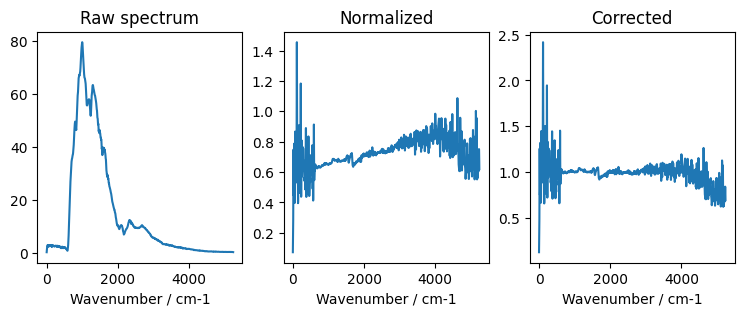

In [5]:

import matplotlib.pyplot as plt

channel = "O2A"
normdata = spectra.NormalizeSpectrum(spectra.DataTypes.Amplitude).transform(s.data[channel],r.data[channel])
corrdata = spectra.LinearNormalize(wavenumber1=1000, wavenumber2=2200, datatype=spectra.DataTypes.Amplitude).transform(normdata,s.data["Wavenumber"])

# Plotting the raw data
px = 1/plt.rcParams['figure.dpi']
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(900*px, 300*px))
im1=ax1.plot(s.data["Wavenumber"], s.data[channel])
ax1.set_title('Raw spectrum')
ax1.set_xlabel("Wavenumber / cm-1")

# Plotting the normalized
im2=ax2.plot(s.data["Wavenumber"],normdata)
ax2.set_title('Normalized')
ax2.set_xlabel("Wavenumber / cm-1")

# Plotting the corrected data
im3=ax3.plot(s.data["Wavenumber"],corrdata)
ax3.set_title('Corrected')
ax3.set_xlabel("Wavenumber / cm-1")

plt.plot()

## Interferogram processing

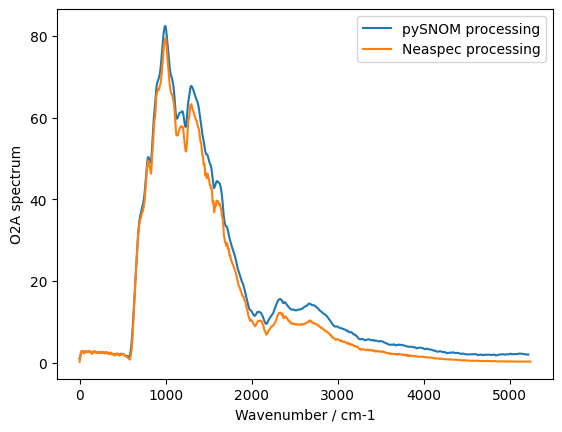

In [10]:
import numpy as np
import pySNOM
from pySNOM import readers
from pySNOM.interferograms import NeaInterferogram, ProcessSingleChannel, ProcessMultiChannels, ProcessAllPoints
import os

fdata = 'datasets/testifg_singlepoint.txt'
data_reader = readers.NeaInterferogramReader(os.path.join(pySNOM.__path__[0], fdata))
data, measparams = data_reader.read()

ifg = NeaInterferogram(data,measparams,filename=fdata)

# a2, p2, wn2 = ProcessSingleChannel(order=2,simpleoutput=True).transform(ifg)
# s_multichannel = ProcessMultiChannels(apod=True).transform(ifg)
s_allpoints = ProcessAllPoints().transform(ifg)

import matplotlib.pyplot as plt
plt.plot(s_allpoints.data["Wavenumber"],s_allpoints.data[channel],s.data["Wavenumber"], s.data[channel])
plt.xlabel("Wavenumber / cm-1")
plt.ylabel(f'{channel} spectrum')
plt.legend(['pySNOM processing', 'Neaspec processing'])

## Tests on Orange data

[]

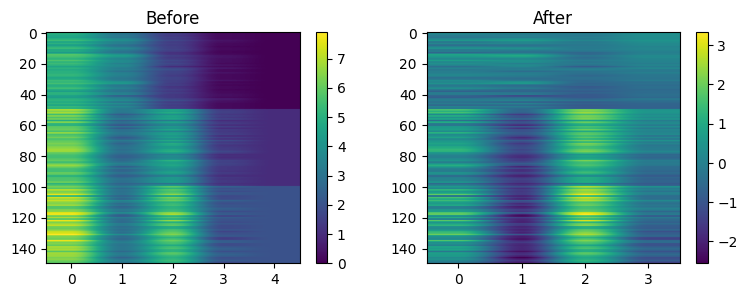

In [7]:
import Orange
import matplotlib.pyplot as plt
from pySNOM import readers, images

# Orange data
data = Orange.data.Table("iris")
# Plotting the BEFORE
px = 1/plt.rcParams['figure.dpi']
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(900*px, 300*px))
im1 = ax1.imshow(data,aspect='auto')
ax1.set_title('Before')
fig.colorbar(im1,ax=ax1)

# Processing
transformer = images.BackgroundPolyFit(xorder=1,yorder=1)
newdata, b = transformer.transform(data.X)

# Plotting the AFTER
im2= ax2.imshow(newdata, aspect='auto')
ax2.set_title('After')
fig.colorbar(im2,ax=ax2)

plt.plot()